<a href="https://colab.research.google.com/github/sadra-kiaei/INSE-6220-project---Fall-2023-/blob/main/Another_copy_of_SampleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Upload File**

In [50]:
#read cvs file into dataframe
df = pd.read_csv('/content/new_set.csv')
df.head(n=25)

,Lung nodule masses,Density of nodule,level of carcinoembryonic antigen in blood,Mass of effusion,Density of pleural,Level of pro-gastrin-releasing peptide in blood,Infected_lung
0,203.825685,105.168876,65.788935,170.957811,147.305251,79.415685,1
1,172.278038,75.010576,59.677917,134.688493,109.443531,74.244650,1
2,147.704574,59.419642,34.617937,94.037579,157.567604,102.763115,1
3,199.183091,95.200417,68.343191,163.543608,138.950080,76.974791,1
4,182.772179,102.965750,38.405893,141.371643,149.944316,54.095756,1
5,198.904864,98.419773,51.456863,149.876636,166.144518,77.275339,0
6,85.503368,32.149932,40.846783,72.996715,49.168006,49.140829,0
7,235.532768,120.008713,90.061802,210.070515,166.348375,64.022868,1
8,197.880569,112.831433,49.926390,162.757822,177.181233,57.747455,1
9,197.927734,102.467584,65.477792,167.945376,138.507165,72.286736,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Lung nodule masses                               90 non-null     float64
 1   Density of nodule                                90 non-null     float64
 2   level of carcinoembryonic antigen in blood       90 non-null     float64
 3   Mass of effusion                                 90 non-null     float64
 4   Density of pleural                               90 non-null     float64
 5   Level of pro-gastrin-releasing peptide in blood  90 non-null     float64
 6   Infected_lung                                    90 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 5.0 KB


### **Classes**

In [53]:
y = df['Infected_lung']
target = df['Infected_lung'].to_numpy()

In [87]:
features = df.drop('Infected_lung', axis=1)

# Standardize the features by removing the mean and scaling to unit variance
# This step is important for covariance-based PCA because the variance
# is maximized, not the covariance itself.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Calculate the covariance matrix
cov_matrix = np.cov(features_std.T)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display the eigenvalues
print("Eigenvalues:", eigenvalues)

# Display the eigenvectors
print("Eigenvectors:", eigenvectors)

Eigenvalues: [4.57532767e+00 7.45660072e-01 5.99805147e-01 9.63732013e-02
 5.02496409e-02 3.71552303e-16]
Eigenvectors: [[ 4.40384967e-01  2.48807891e-01 -1.09497665e-01 -8.55525176e-01
   1.55772318e-02  1.22736856e-10]
 [ 4.38622793e-01  3.56933486e-01 -1.23567402e-01  3.35126105e-01
  -5.64431129e-01 -4.83784688e-01]
 [ 4.15685849e-01 -3.60004578e-01 -4.14180616e-01  1.73251130e-01
   6.02101464e-01 -3.65396044e-01]
 [ 4.57823931e-01  5.17248675e-02 -2.65472972e-01  2.83472348e-01
  -6.67173740e-02  7.95259773e-01]
 [ 3.56687900e-01  3.00546443e-01  7.64219611e-01  1.80615053e-01
   4.07175842e-01 -2.19211529e-10]
 [ 3.22563779e-01 -7.66867783e-01  3.82999038e-01 -1.13017010e-01
  -3.85234089e-01  2.59341091e-10]]


### **Features**

Data Matrix

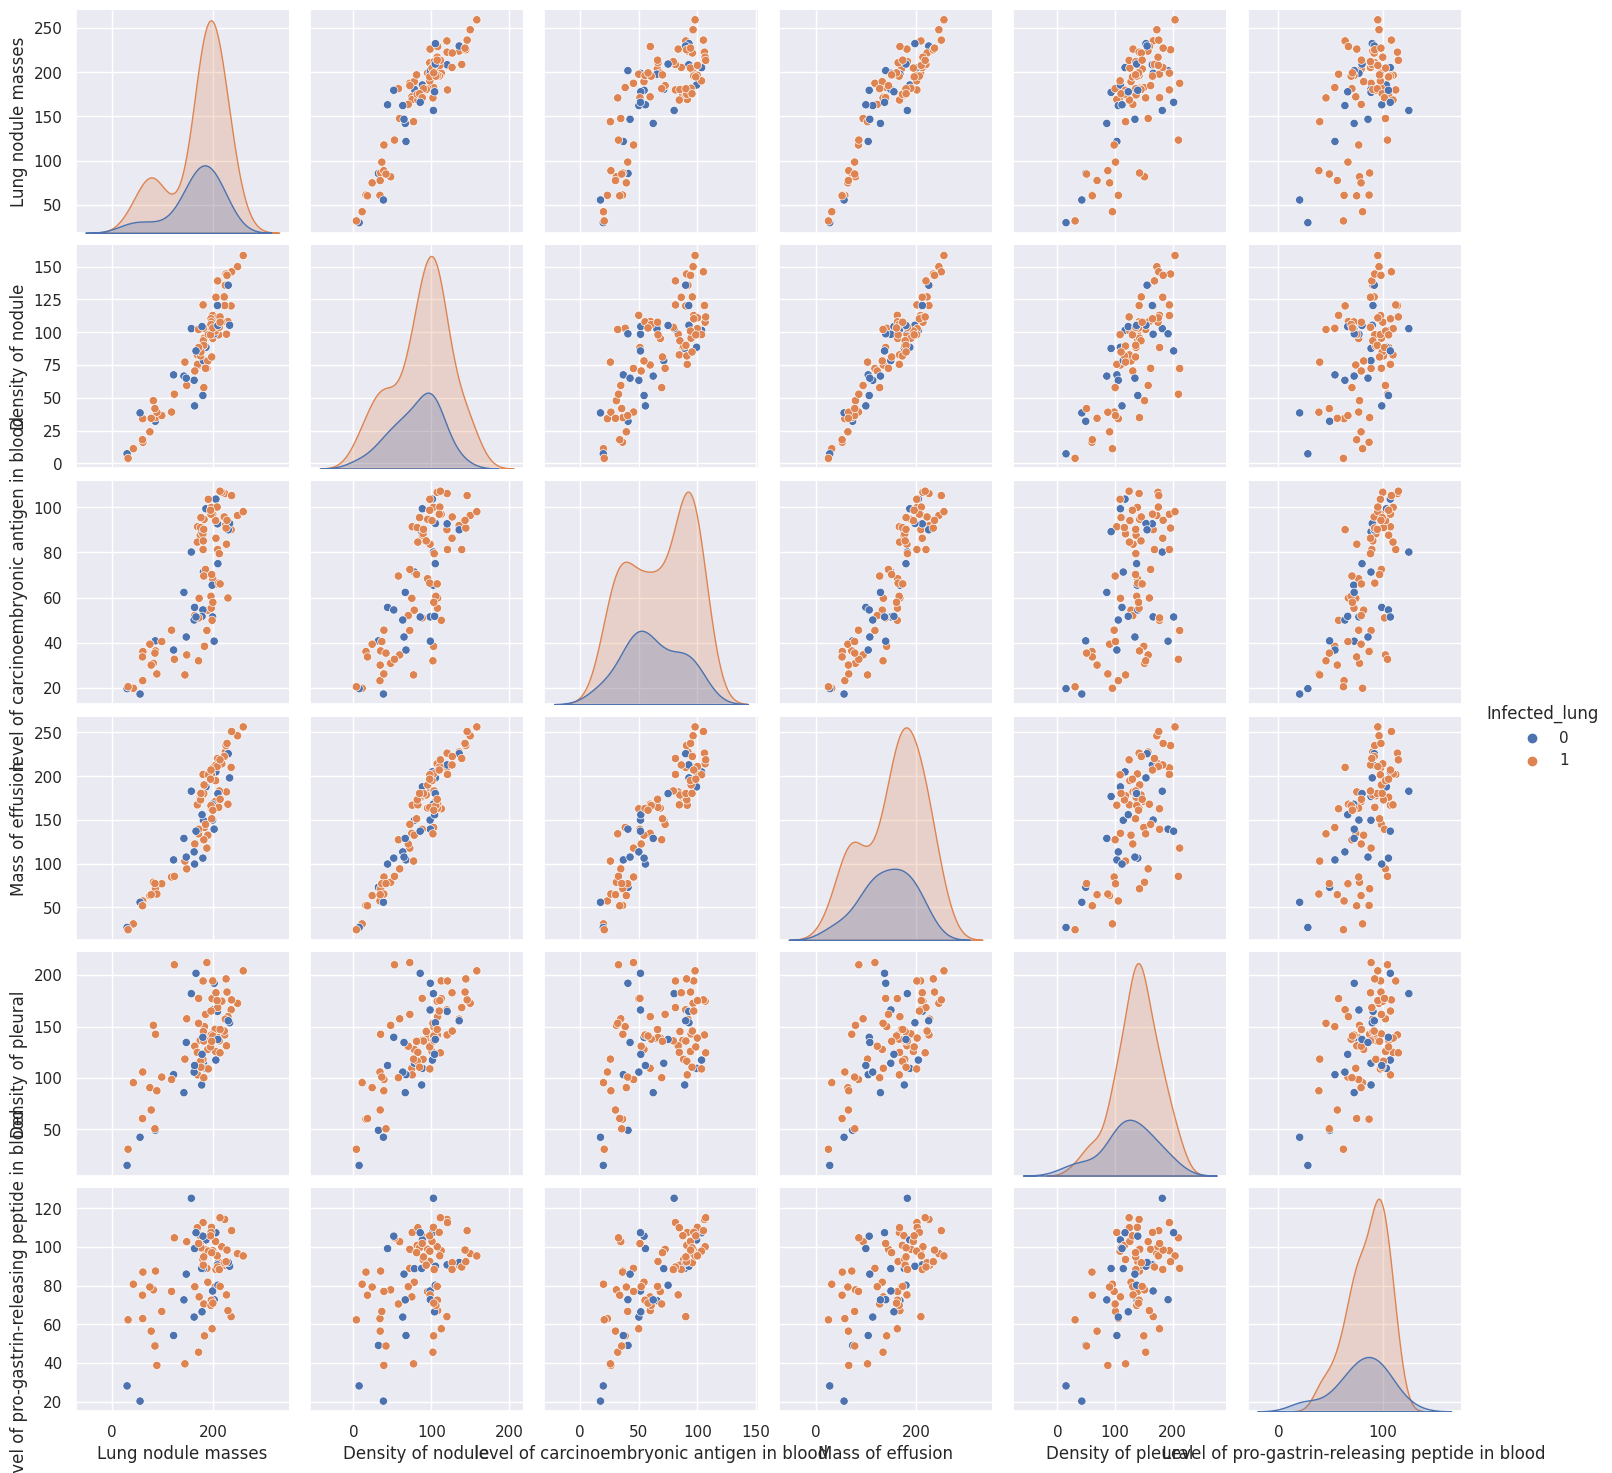

In [84]:
sns.pairplot(df,hue='Infected_lung')
plt.show()

In [54]:
X = df.iloc[:,0:6]
X.head(10)

,Lung nodule masses,Density of nodule,level of carcinoembryonic antigen in blood,Mass of effusion,Density of pleural,Level of pro-gastrin-releasing peptide in blood
0,203.825685,105.168876,65.788935,170.957811,147.305251,79.415685
1,172.278038,75.010576,59.677917,134.688493,109.443531,74.244650
2,147.704574,59.419642,34.617937,94.037579,157.567604,102.763115
3,199.183091,95.200417,68.343191,163.543608,138.950080,76.974791
4,182.772179,102.965750,38.405893,141.371643,149.944316,54.095756
5,198.904864,98.419773,51.456863,149.876636,166.144518,77.275339
6,85.503368,32.149932,40.846783,72.996715,49.168006,49.140829
7,235.532768,120.008713,90.061802,210.070515,166.348375,64.022868
8,197.880569,112.831433,49.926390,162.757822,177.181233,57.747455
9,197.927734,102.467584,65.477792,167.945376,138.507165,72.286736


In [55]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lung nodule masses,90.0,170.942323,53.799936,29.811068,158.186678,182.379635,205.479644,259.440855
Density of nodule,90.0,85.926855,35.082745,3.923990,65.360862,94.320501,107.132178,158.377995
level of carcinoembryonic antigen in blood,90.0,67.025774,26.497524,17.304892,43.268953,67.368341,91.258428,107.080649
Mass of effusion,90.0,152.952629,57.670068,24.448911,108.984688,165.393925,197.700734,256.384378
Density of pleural,90.0,134.257895,40.752236,15.003487,109.703873,138.133208,161.306162,212.217689
Level of pro-gastrin-releasing peptide in blood,90.0,84.349024,20.614003,20.366537,72.557972,88.871511,99.118346,125.196741


Notice that the data is not standardizd. So we need to standarize it.

In [56]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lung nodule masses,90.0,3.774758e-16,1.005602,-2.637957,-0.238422,0.213781,0.645555,1.654172
Density of nodule,90.0,2.140263e-16,1.005602,-2.350508,-0.589498,0.240593,0.607824,2.076720
level of carcinoembryonic antigen in blood,90.0,5.097774e-16,1.005602,-1.886947,-0.901590,0.013001,0.919649,1.520115
Mass of effusion,90.0,-3.281326e-16,1.005602,-2.240740,-0.766676,0.216941,0.780280,1.803556
Density of pleural,90.0,6.707597e-16,1.005602,-2.942722,-0.605895,0.095627,0.667443,1.923736
Level of pro-gastrin-releasing peptide in blood,90.0,8.092292e-16,1.005602,-3.121225,-0.575197,0.220618,0.720484,1.992653


Notice that the data is now standardizd.

**Observations and variables**

In [58]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
['Lung nodule masses', 'Density of nodule', 'level of carcinoembryonic antigen in blood', 'Mass of effusion', 'Density of pleural', 'Level of pro-gastrin-releasing peptide in blood']


## **Data Visualisation**

### Class Distribution

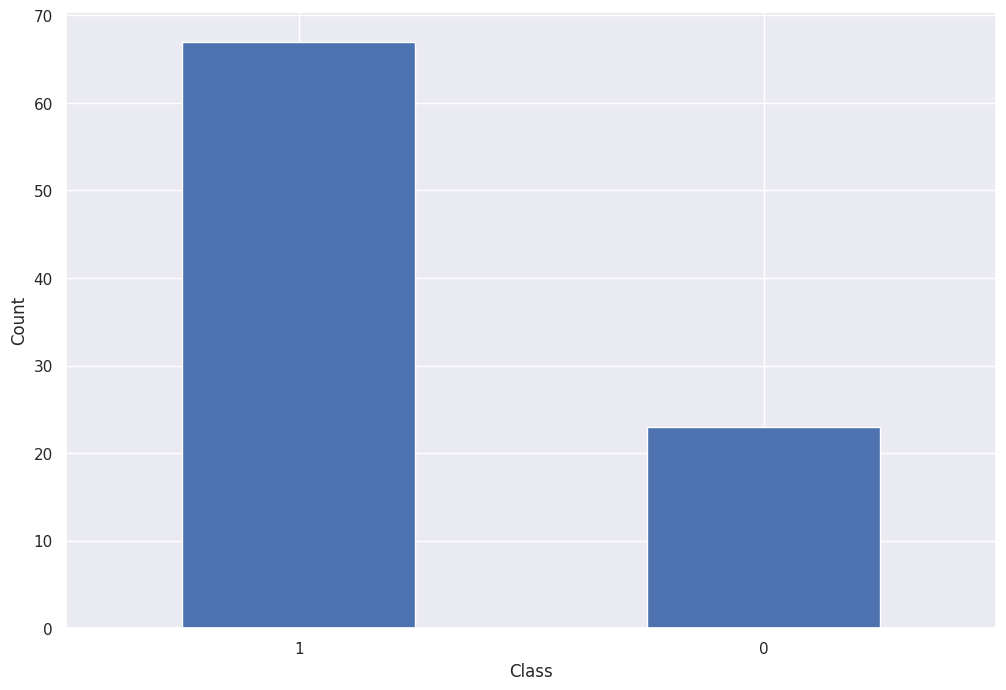

In [60]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

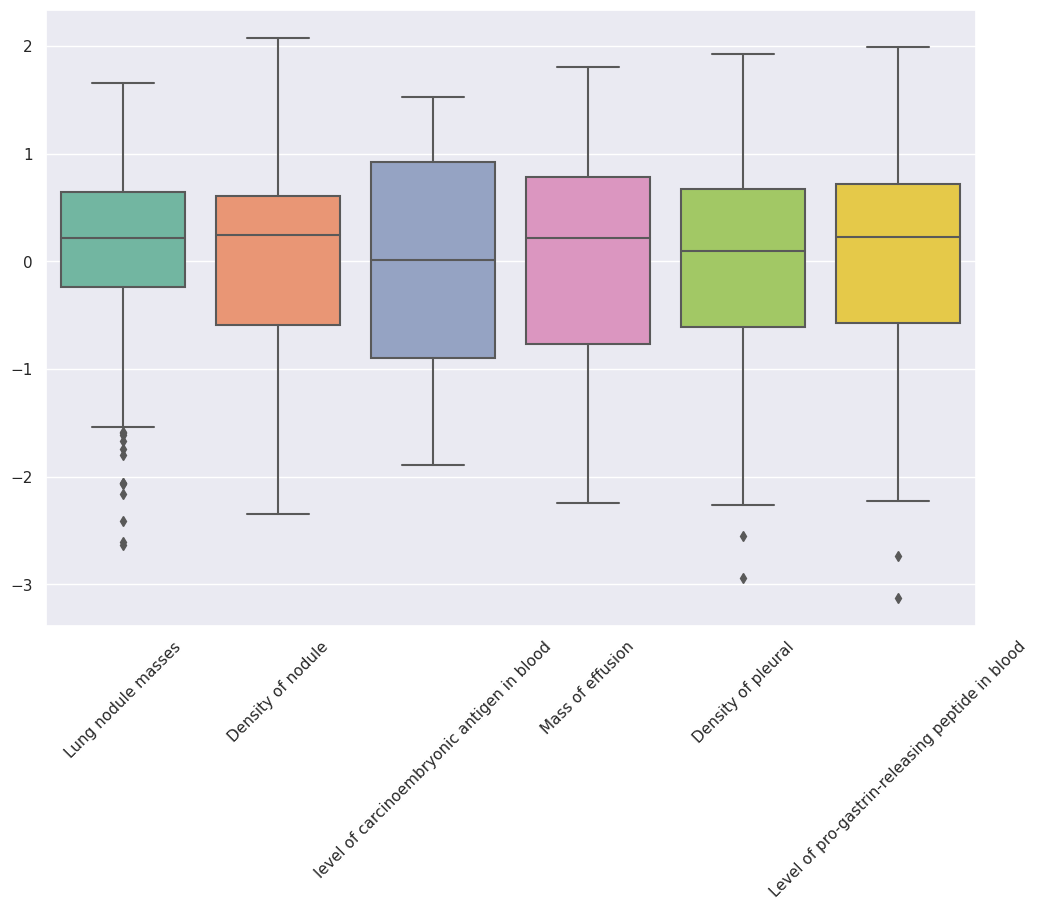

In [61]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


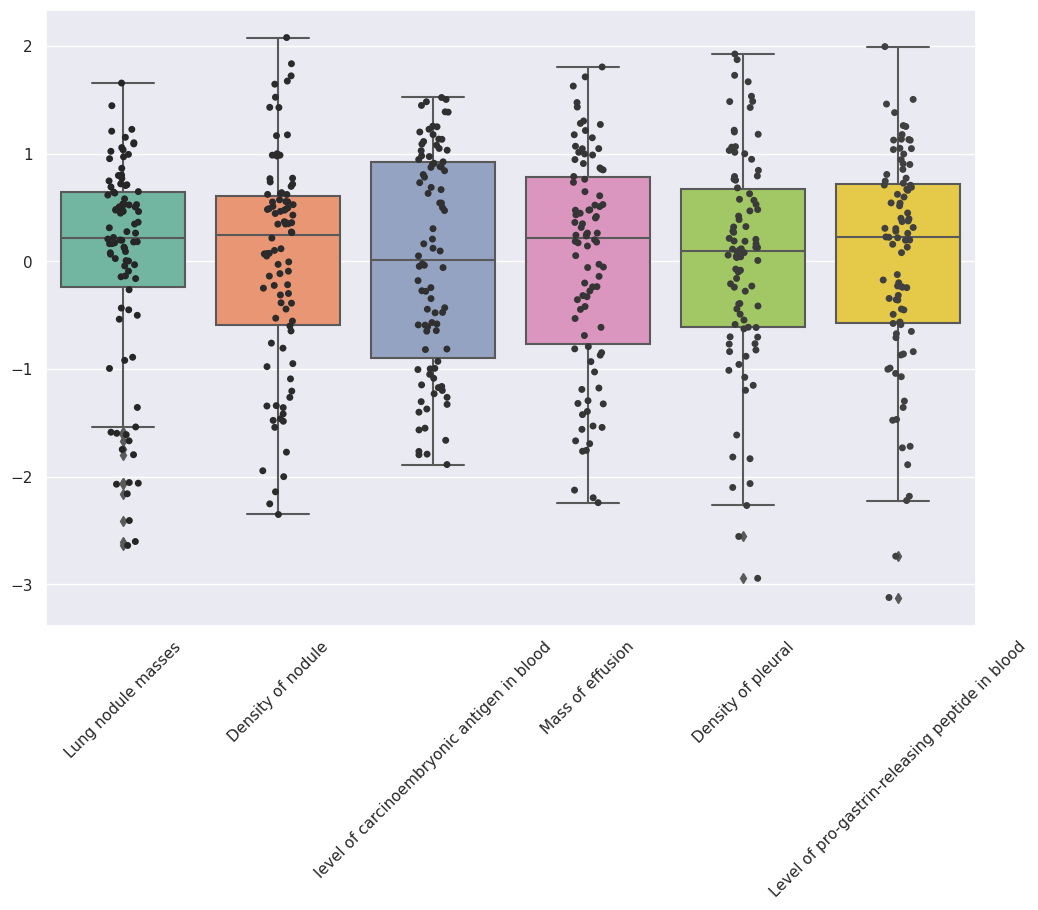

In [62]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [63]:
df.describe()

,Lung nodule masses,Density of nodule,level of carcinoembryonic antigen in blood,Mass of effusion,Density of pleural,Level of pro-gastrin-releasing peptide in blood
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,3.774758e-16,2.140263e-16,5.097774e-16,-3.281326e-16,6.707597e-16,8.092292e-16
std,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00
min,-2.637957e+00,-2.350508e+00,-1.886947e+00,-2.240740e+00,-2.942722e+00,-3.121225e+00
25%,-2.384223e-01,-5.894981e-01,-9.015904e-01,-7.666761e-01,-6.058951e-01,-5.751968e-01
50%,2.137807e-01,2.405932e-01,1.300070e-02,2.169409e-01,9.562724e-02,2.206181e-01
75%,6.455548e-01,6.078236e-01,9.196487e-01,7.802799e-01,6.674431e-01,7.204842e-01
max,1.654172e+00,2.076720e+00,1.520115e+00,1.803556e+00,1.923736e+00,1.992653e+00


### Pair Plot

## **Covariance**

Text(0.5, 1.0, 'Covariance matrix for the adjusted dataset of the Gas Turbine')

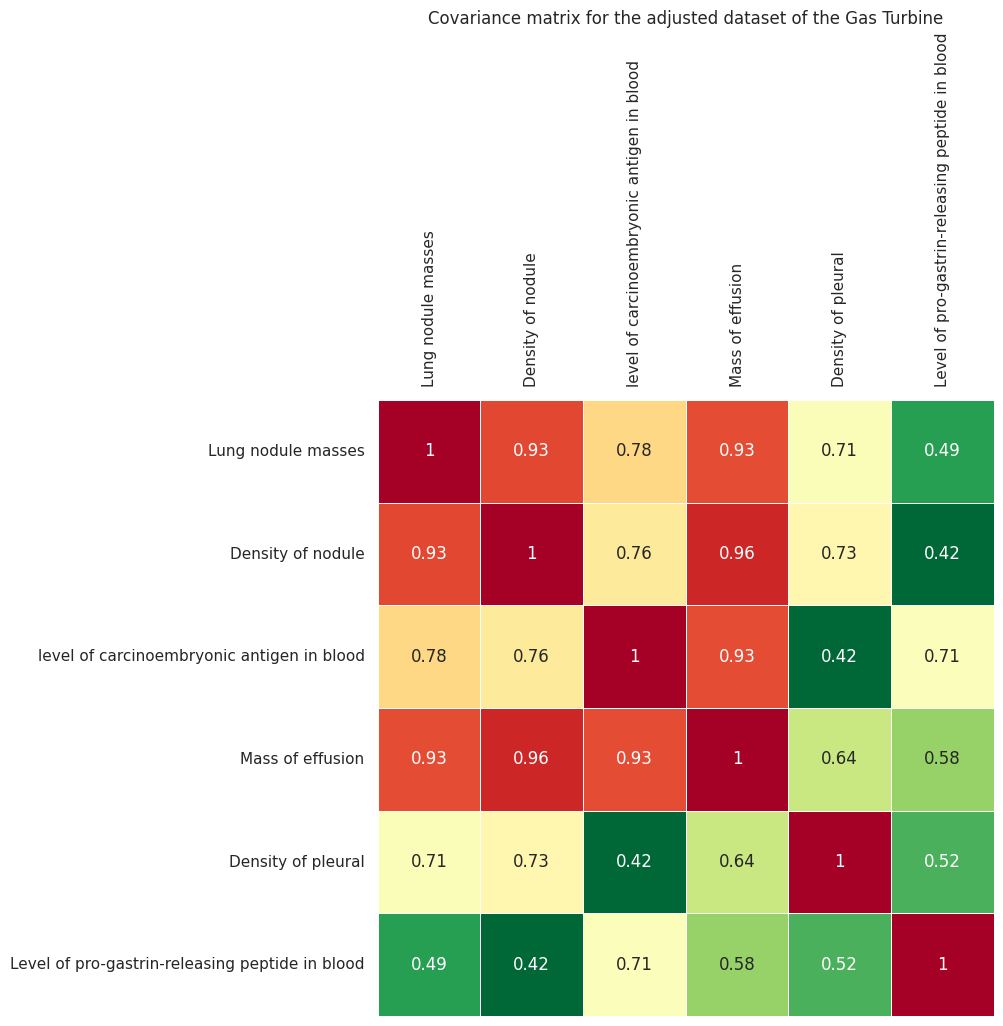

In [64]:
#Covariance Matrix
#The following snippet of code calculates the
data_covariance_combine_adjusted = df - df. mean ()
covariance_matrix_combined = sns.heatmap (data_covariance_combine_adjusted.cov(),cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks (rotation=0)
covariance_matrix_combined. tick_params (labelbottom=False, labeltop=True)
covariance_matrix_combined. set_xticklabels (covariance_matrix_combined.get_xticklabels(), rotation=90);
plt.title('Covariance matrix for the adjusted dataset of the Gas Turbine')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

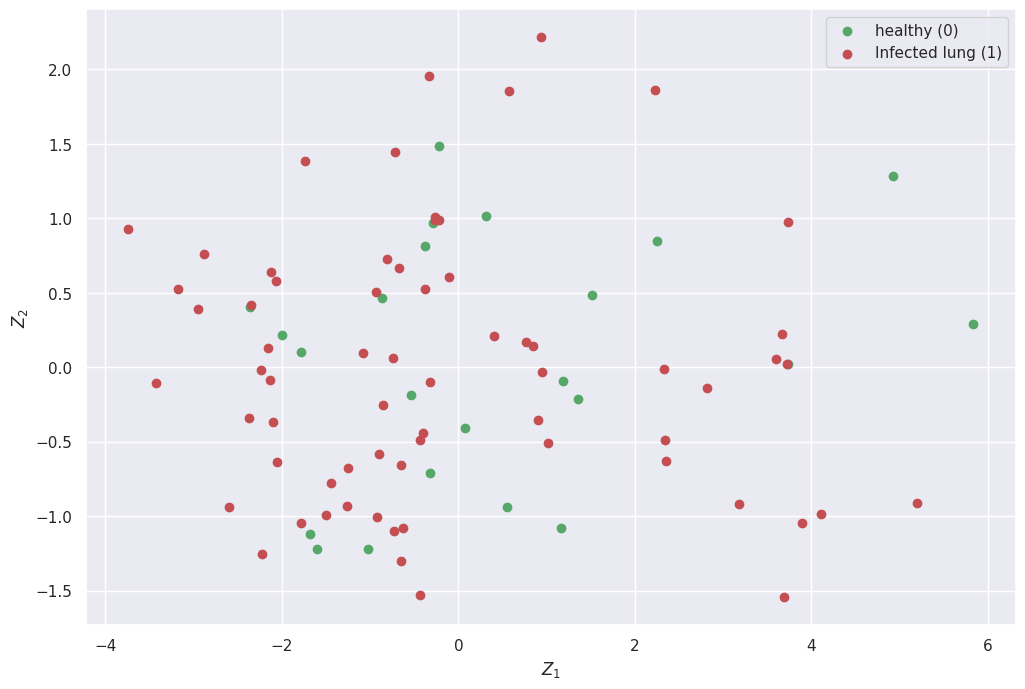

In [65]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)
idx_healthy = np.where(y == 0)
idx_Infected_lung = np.where(y == 1)
plt. figure()
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='g', label='healthy (0)')
plt.scatter(Z[idx_Infected_lung,0], Z[idx_Infected_lung,1], c='r', label='Infected lung (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

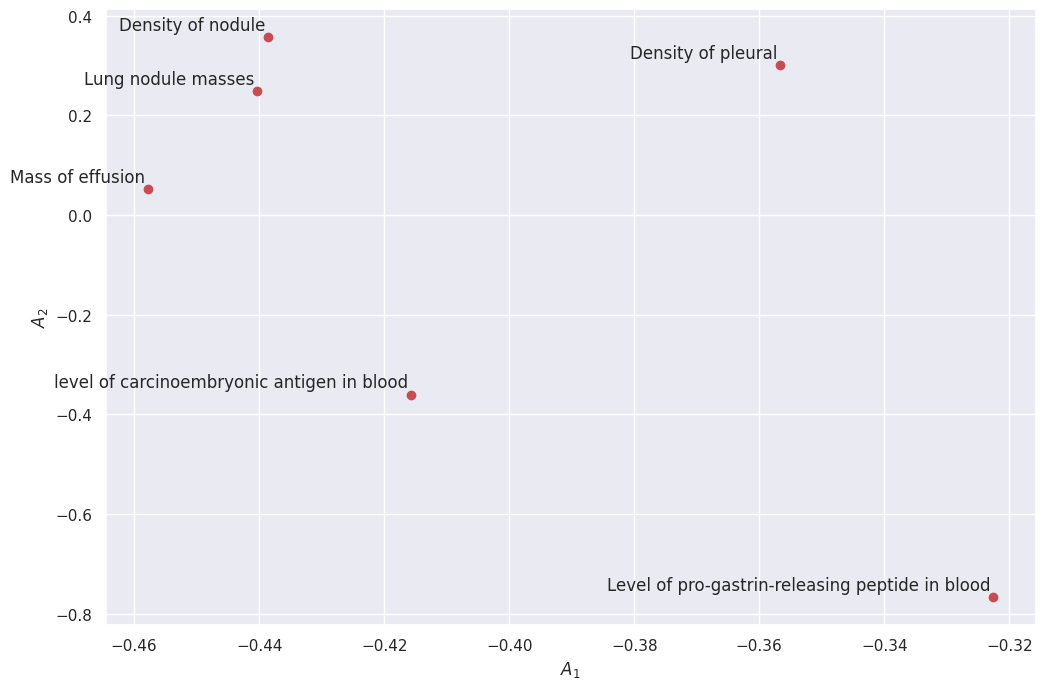

In [66]:
A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


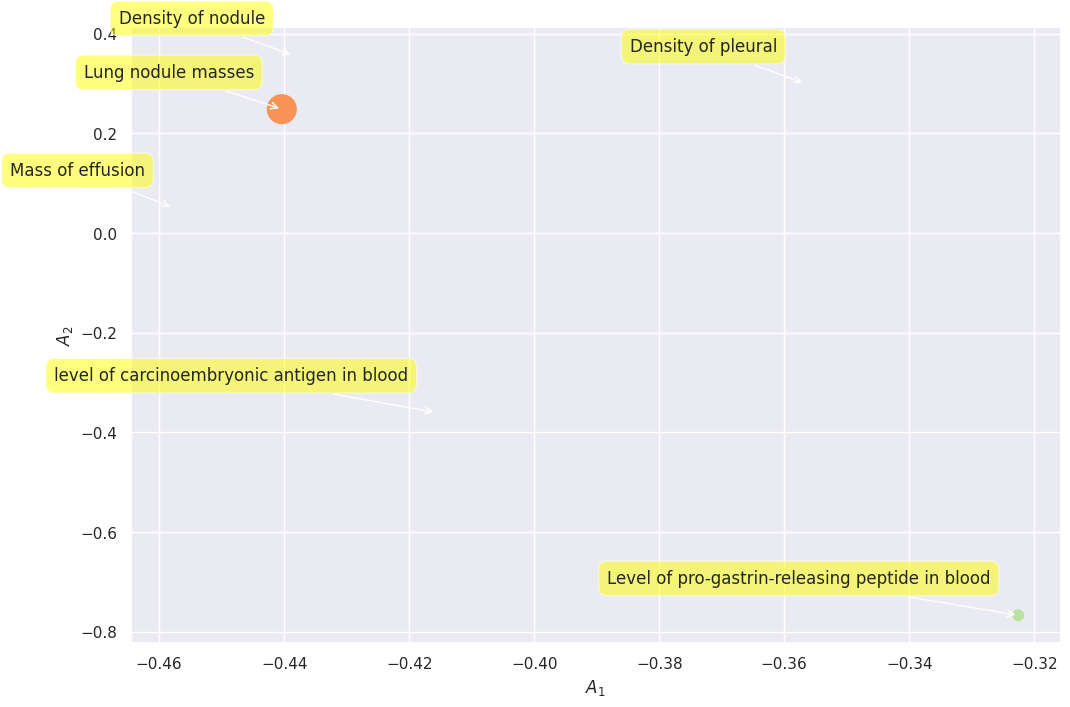

In [67]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

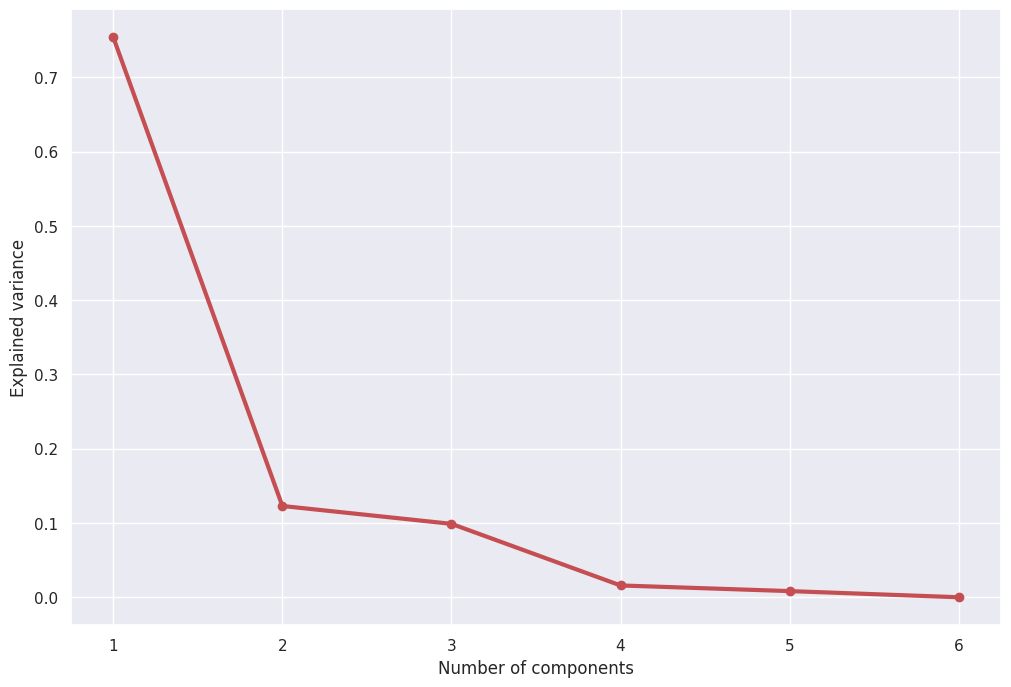

In [68]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

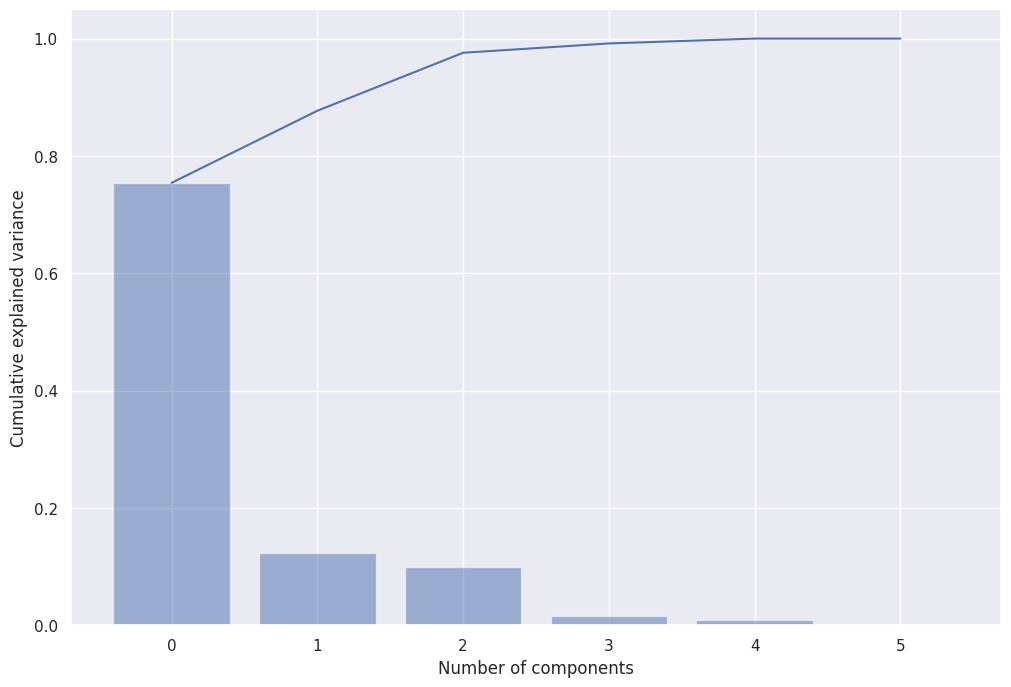

In [69]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [70]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (75.4%)',
 '1': 'PC 2 (12.3%)',
 '2': 'PC 3 (9.9%)',
 '3': 'PC 4 (1.6%)',
 '4': 'PC 5 (0.8%)',
 '5': 'PC 6 (0.0%)'}

### **Biplot**

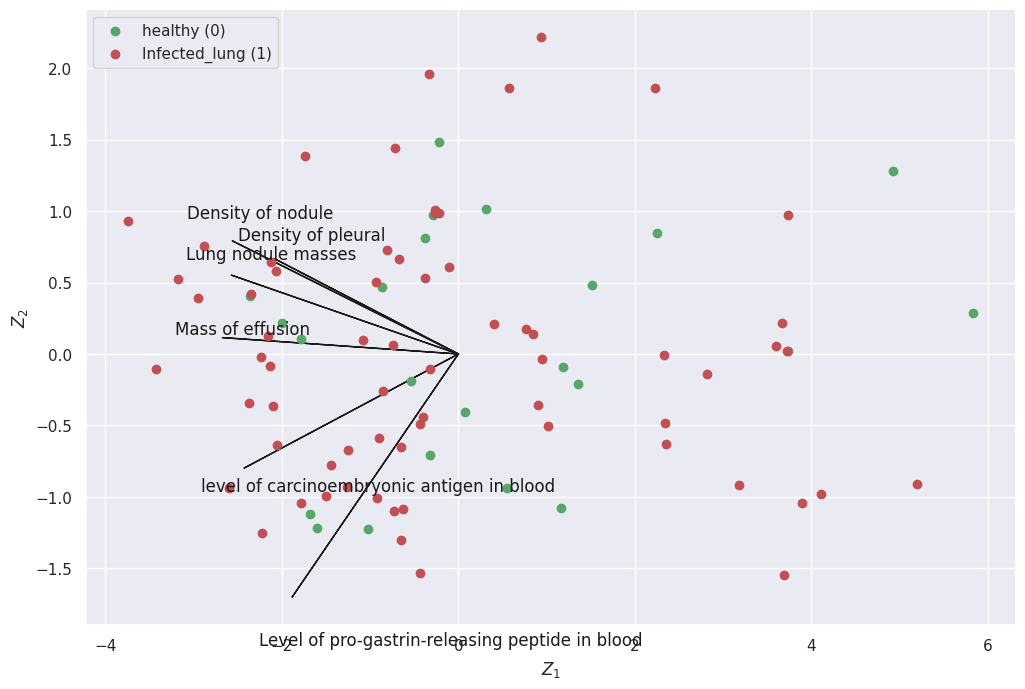

In [71]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]
plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='g', label='healthy (0)')
plt.scatter(Z[idx_Infected_lung,0], Z[idx_Infected_lung,1], c='r', label='Infected_lung (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Using PCA Librarry**

In [ ]:
#!pip install pca

In [ ]:
#from pca import pca
# Initialize and keep all PCs
#model = pca()
# Fit transform
#out = model.fit_transform(df)

TypeError: ignored

In [ ]:
#model.plot();

NameError: ignored

In [ ]:
 #ax_s = model.biplot(label=False, legend=False)

NameError: ignored

In [ ]:
#model.biplot(legend=False, HT2=True)

In [ ]:
#model.biplot(cmap=None, label=False, legend=False)

NameError: ignored

In [ ]:
#ax = model.biplot3d(legend=False)

### **Principal components**

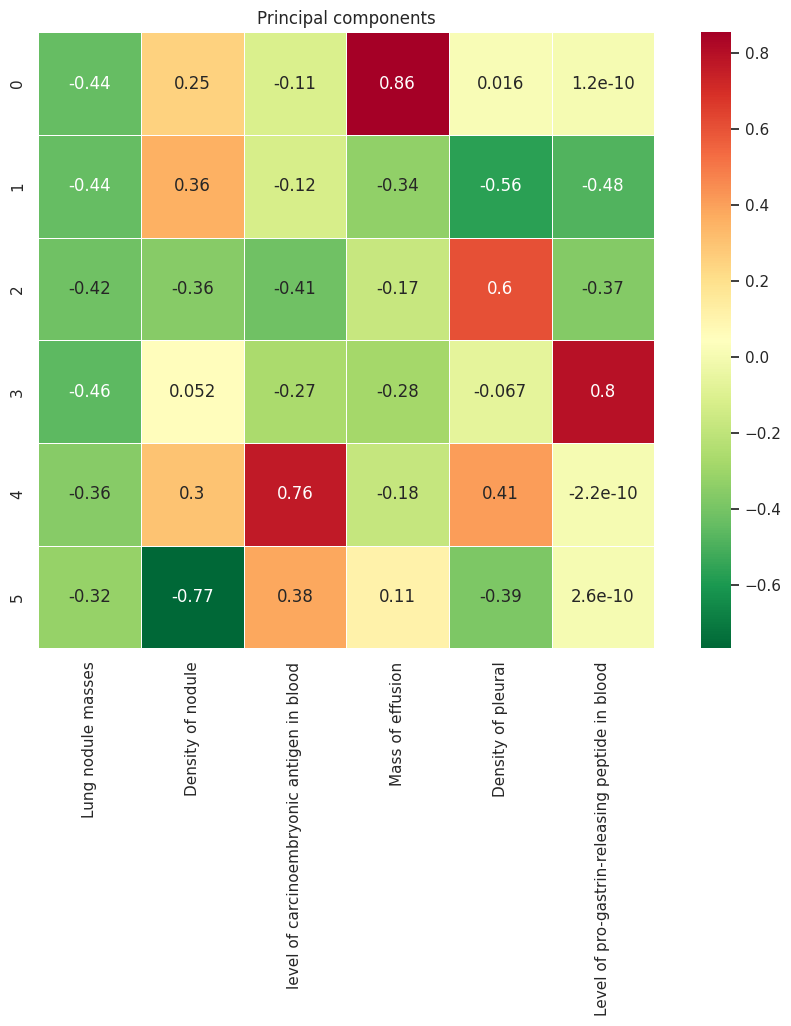

PC1:[-0.44038497 -0.43862279 -0.41568585 -0.45782393 -0.3566879  -0.32256378]
PC2:[ 0.24880789  0.35693349 -0.36000458  0.05172487  0.30054644 -0.76686778]


In [72]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

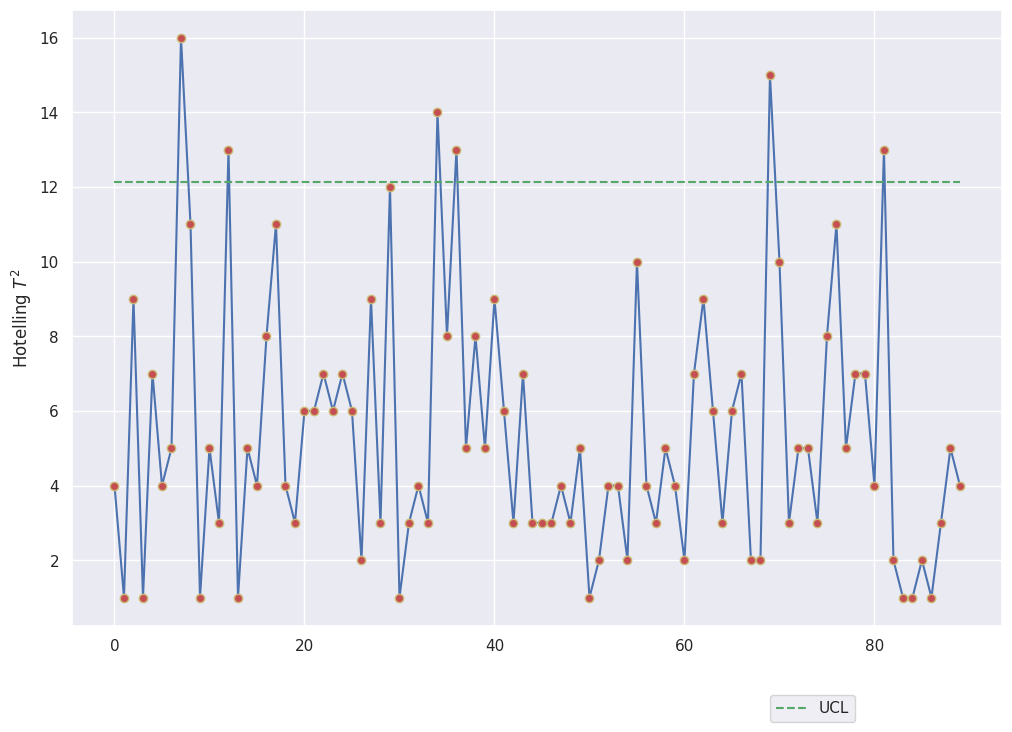

In [73]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [74]:
print(np.argwhere(Tsquare>UCL))

[[ 7]
 [12]
 [34]
 [36]
 [69]
 [81]]


### **Control Charts for Principal Components**

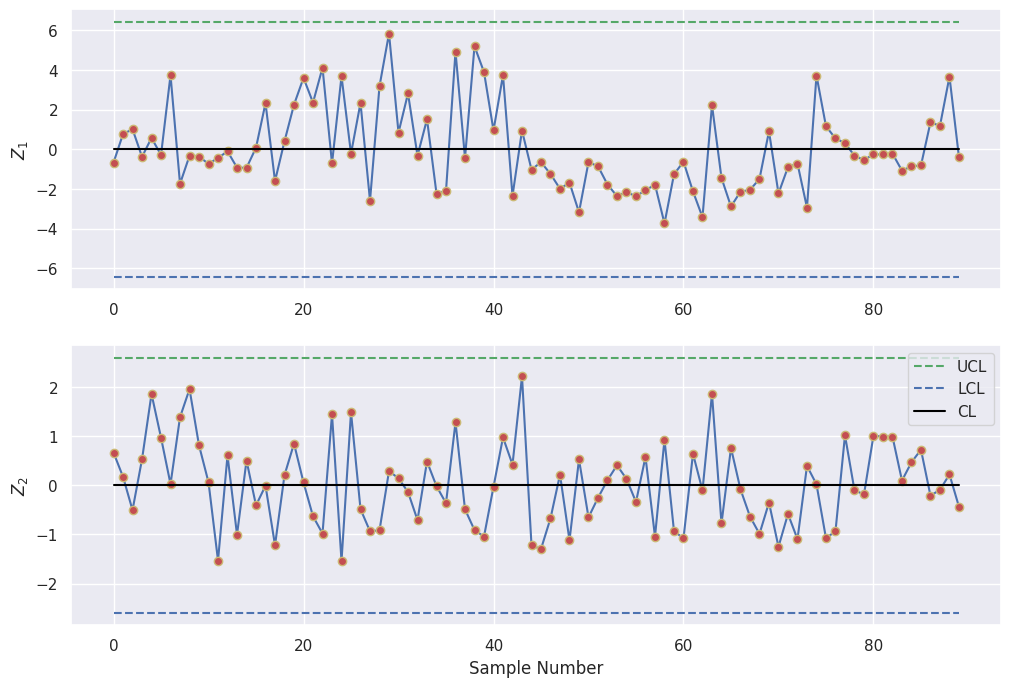

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [75]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


## **Multi-Class Classification**

In [ ]:
#!pip install pycaret

In [ ]:
# #splitting--------------------------------------------
# data = df.sample(frac=0.9, random_state=786)
# data_unseen = df.drop(data.index)

# data.reset_index(drop=True, inplace=True)
# data_unseen.reset_index(drop=True, inplace=True)

# print('Data for Modeling: ' + str(data.shape))
# print('Unseen Data For Predictions: ' + str(data_unseen.shape))
# # Setting up the Environment in PyCaret-------------------------------------


Data for Modeling: (81, 7)
Unseen Data For Predictions: (9, 7)


In [ ]:

#from pycaret.classification import *
#clf = setup(data=data, target='cancered', train_size=0.7, session_id=123)

ValueError: ignored

In [79]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/content/new_set.csv", encoding="utf-8")


# Test-Train Split
Y = df['Infected_lung']
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 63
Test Dataset Size: 27


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000        22

    accuracy                          1.000        27
   macro avg      1.000     1.000     1.000        27
weighted avg      1.000     1.000     1.000        27



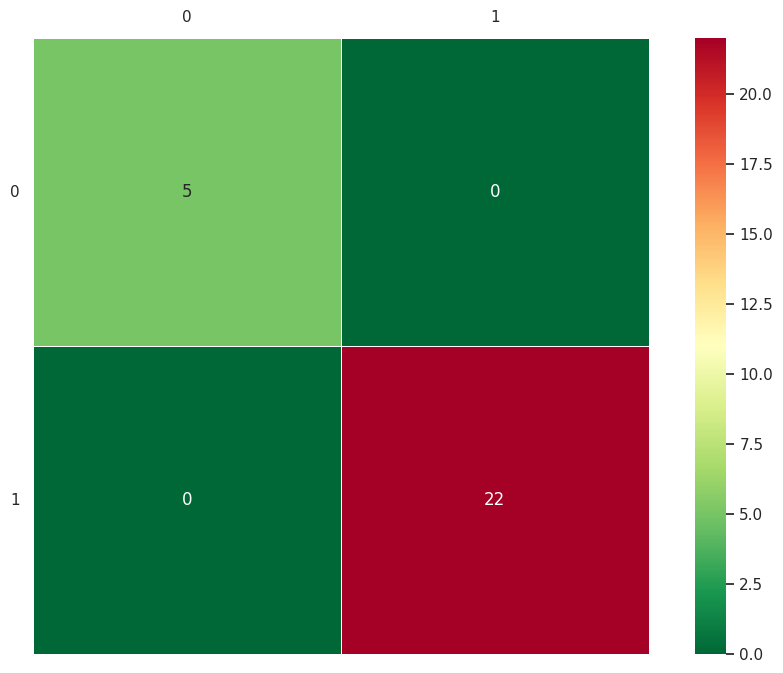

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.792     0.864     0.826        22

    accuracy                          0.704        27
   macro avg      0.396     0.432     0.413        27
weighted avg      0.645     0.704     0.673        27



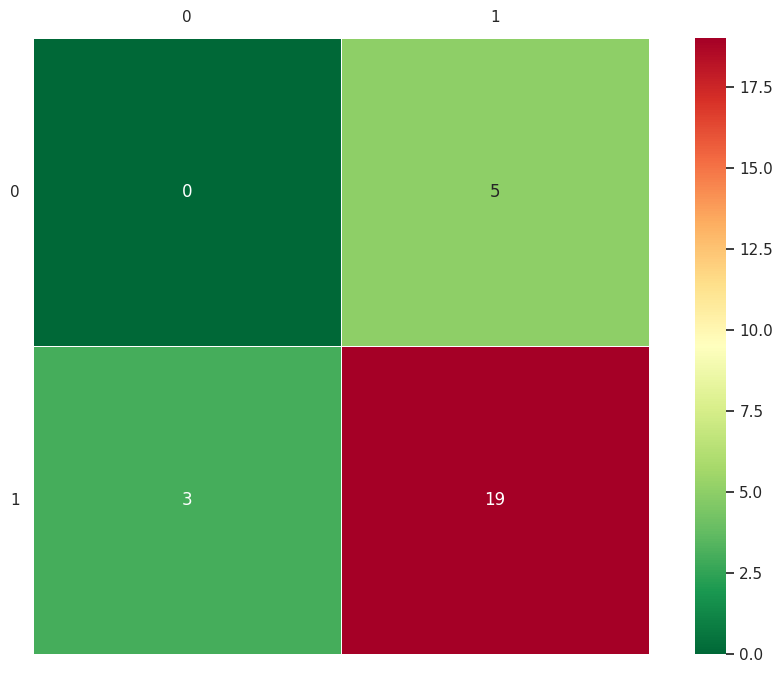

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.800     0.909     0.851        22

    accuracy                          0.741        27
   macro avg      0.400     0.455     0.426        27
weighted avg      0.652     0.741     0.693        27



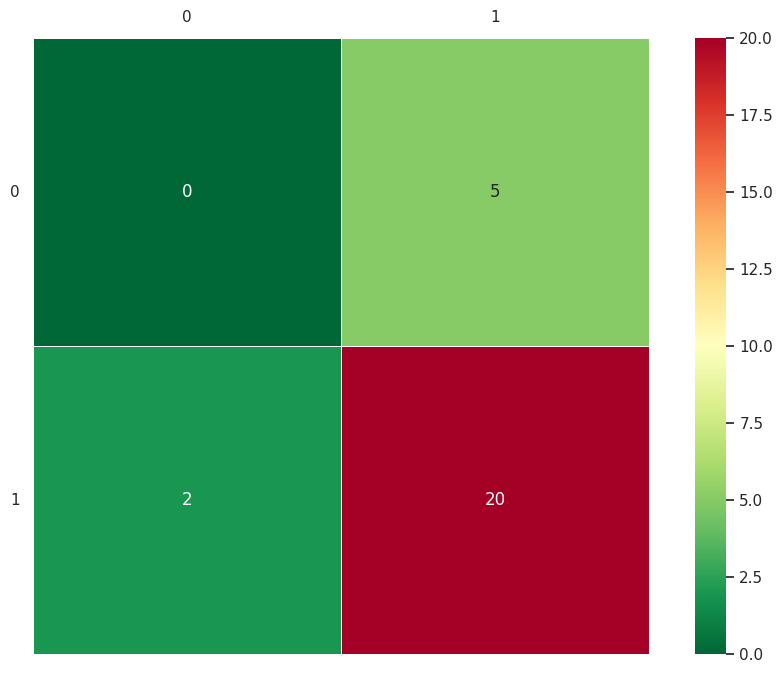

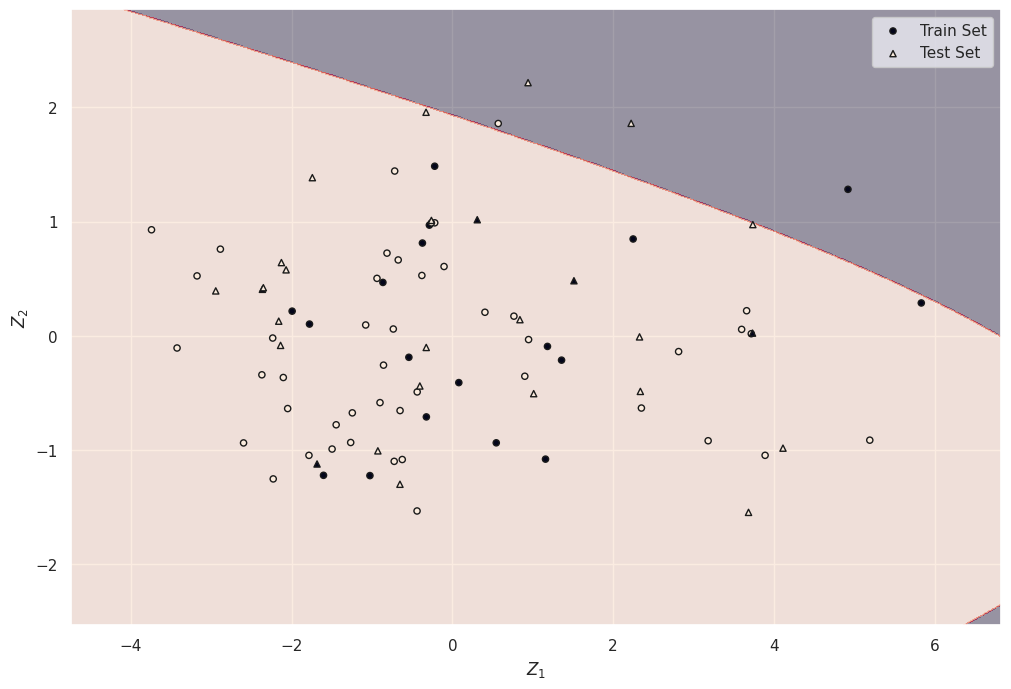

(array([ 2,  7, 12, 13, 18, 21, 23]),)


In [80]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 8}
k_Z: {'n_neighbors': 8}
k_Z12: {'n_neighbors': 8}
                                    0         1         2         3         4
knn_full_data fit_time       0.002735  0.003072  0.002362  0.002412  0.002453
knn_Z  fit_time              0.000905  0.000900  0.000898  0.000884  0.001013
knn_Z12 fit_time             0.000925  0.000886  0.000889  0.001048  0.000988
knn_full_data test_f1_macro  0.628571  0.566667  0.566667  0.400000  0.621053
knn_Z  test_f1_macro         0.409091  0.566667  0.628571  0.400000  0.555556
knn_Z12 test_f1_macro        0.628571  0.566667  0.628571  0.400000  0.700000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.200     0.200     0.200         5
           1      0.818     0.818     0.818        22

    accuracy                          0.704        27
   macro avg      0.509     0.509     0.509        27
weighted avg      0.704     0.704   

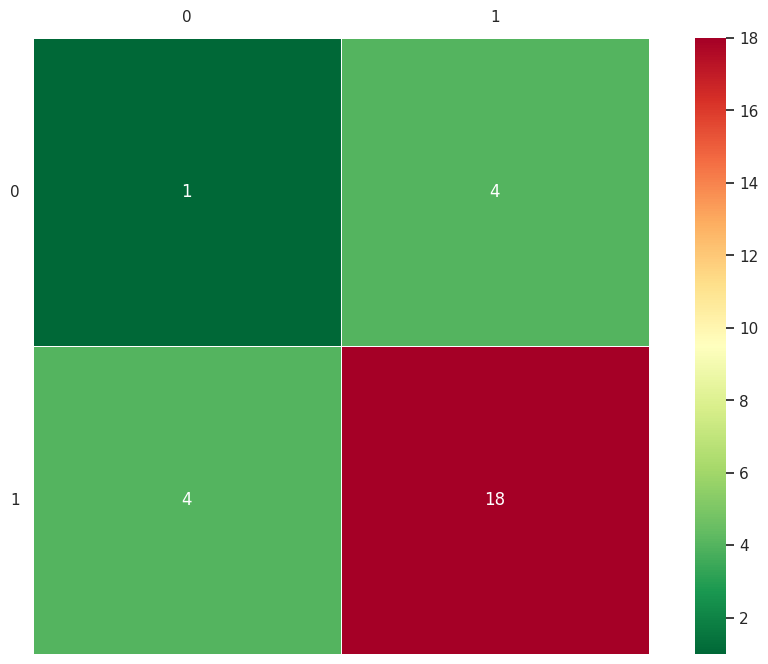

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.167     0.200     0.182         5
           1      0.810     0.773     0.791        22

    accuracy                          0.667        27
   macro avg      0.488     0.486     0.486        27
weighted avg      0.690     0.667     0.678        27



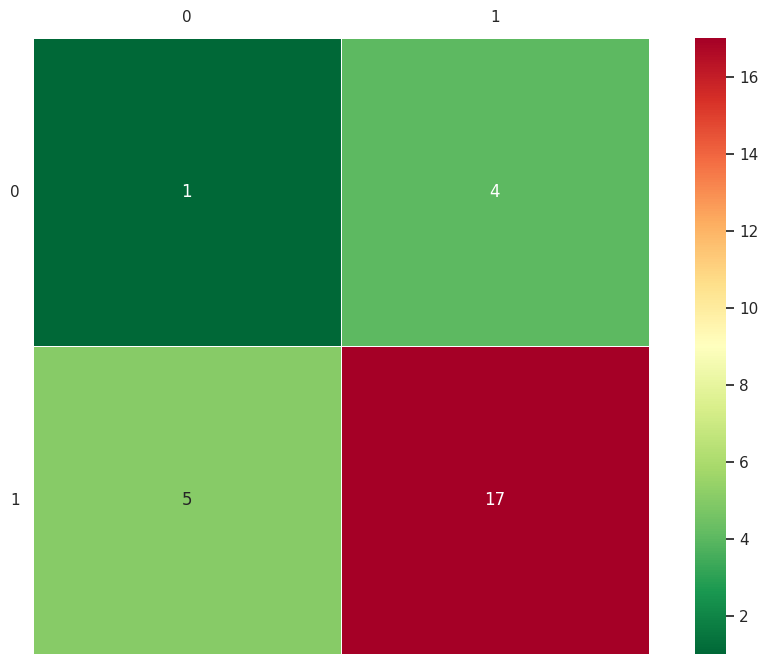

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.800     0.909     0.851        22

    accuracy                          0.741        27
   macro avg      0.400     0.455     0.426        27
weighted avg      0.652     0.741     0.693        27



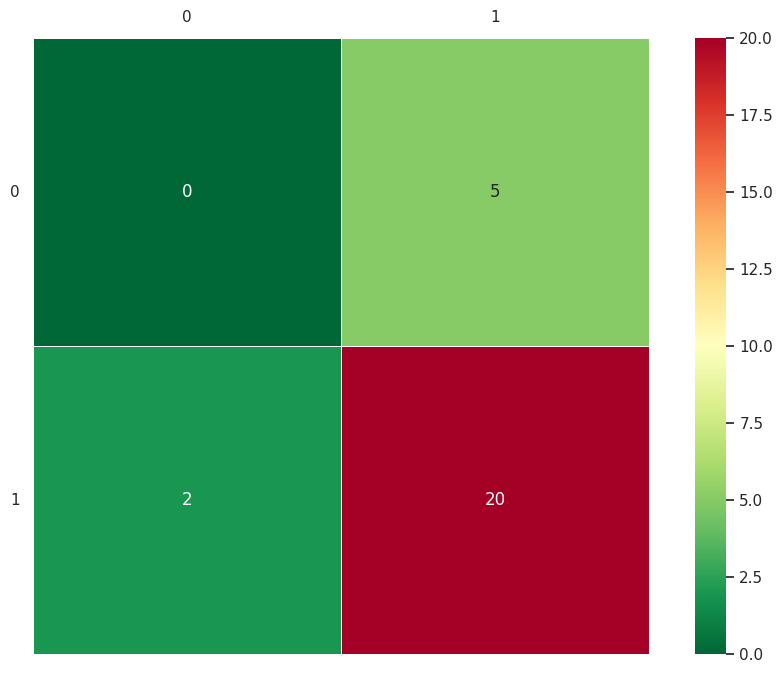

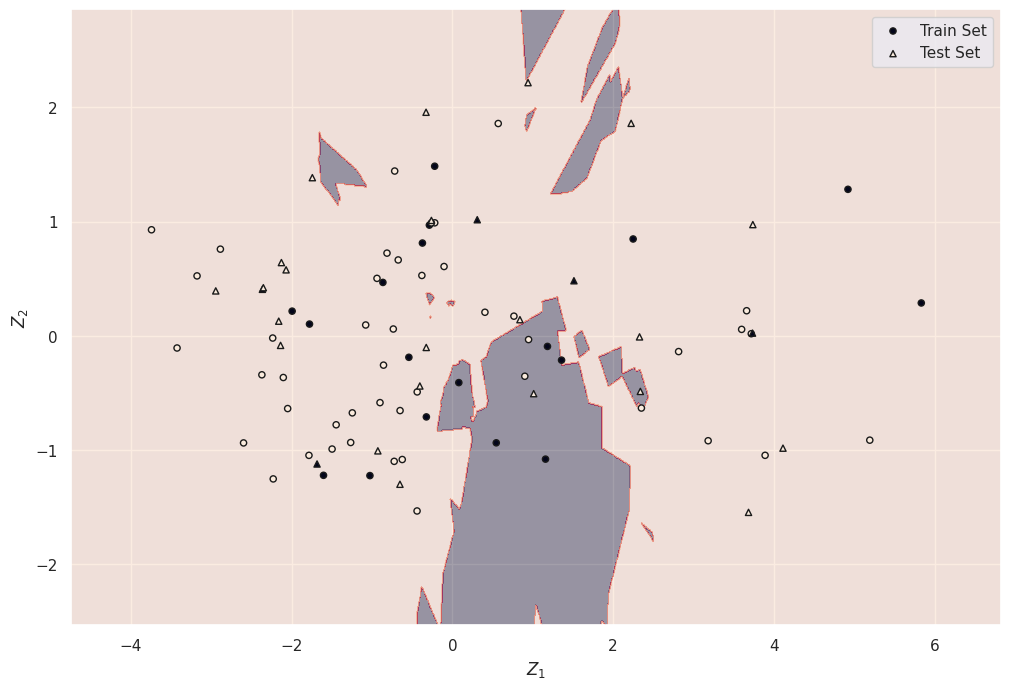

In [81]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.002758  0.002418  0.002320  0.002321  0.002398
dt_Z  fit_time              0.000988  0.000998  0.001872  0.001083  0.000968
dt_Z12 fit_time             0.000974  0.000912  0.000814  0.000836  0.001433
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.380952  0.380952  0.628571  0.555556  0.368421
dt_Z12 test_f1_macro        0.380952  0.380952  0.380952  0.428571  0.621053

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000        22

    accuracy                          1.000        27
   macro avg      1.000     1.000     1.000        27
weighted avg      1.000     1.000    

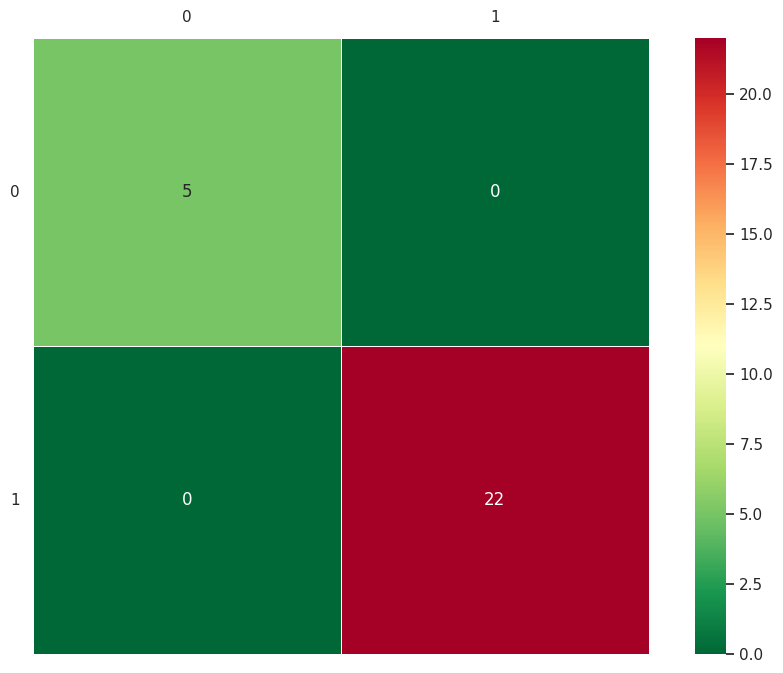

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.783     0.818     0.800        22

    accuracy                          0.667        27
   macro avg      0.391     0.409     0.400        27
weighted avg      0.638     0.667     0.652        27



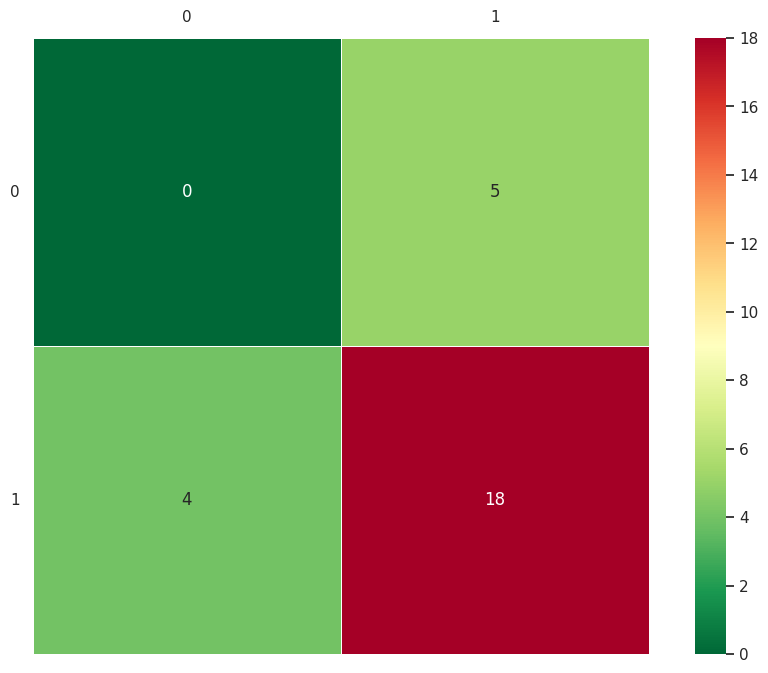

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         5
           1      0.792     0.864     0.826        22

    accuracy                          0.704        27
   macro avg      0.396     0.432     0.413        27
weighted avg      0.645     0.704     0.673        27



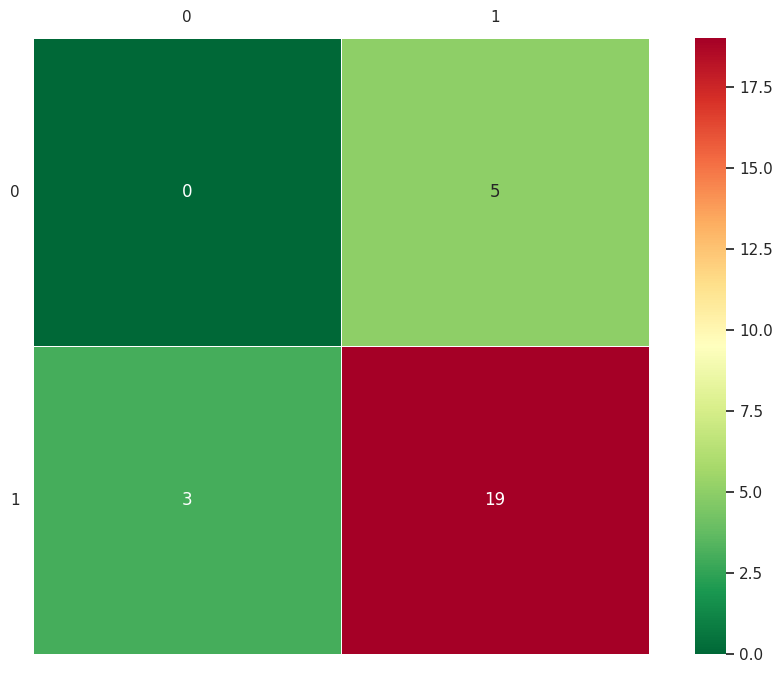

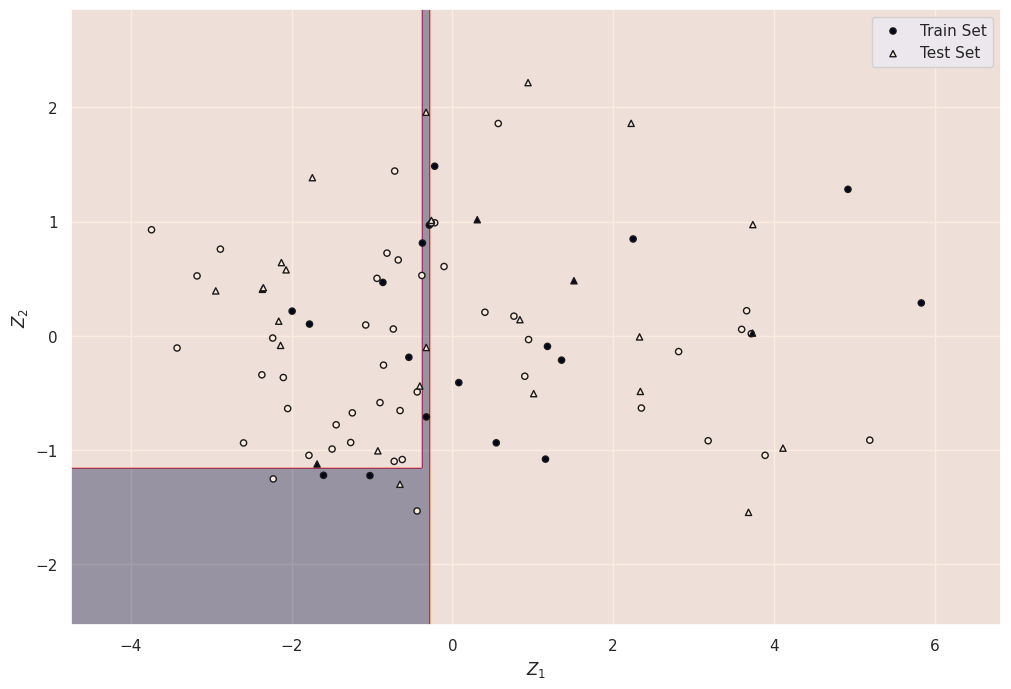

In [82]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


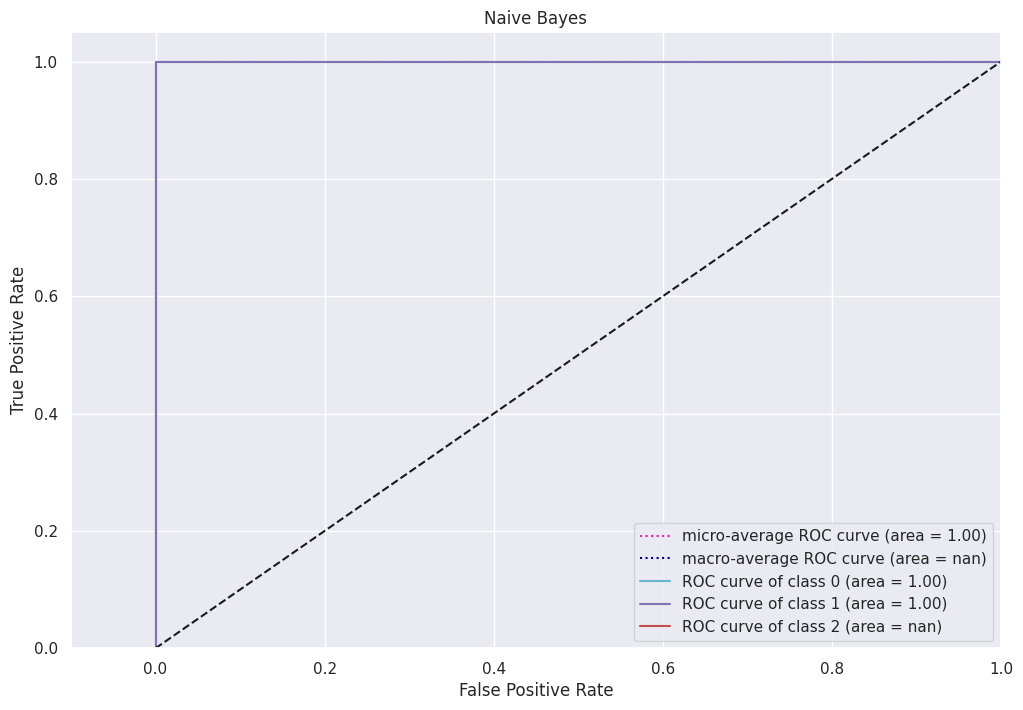

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


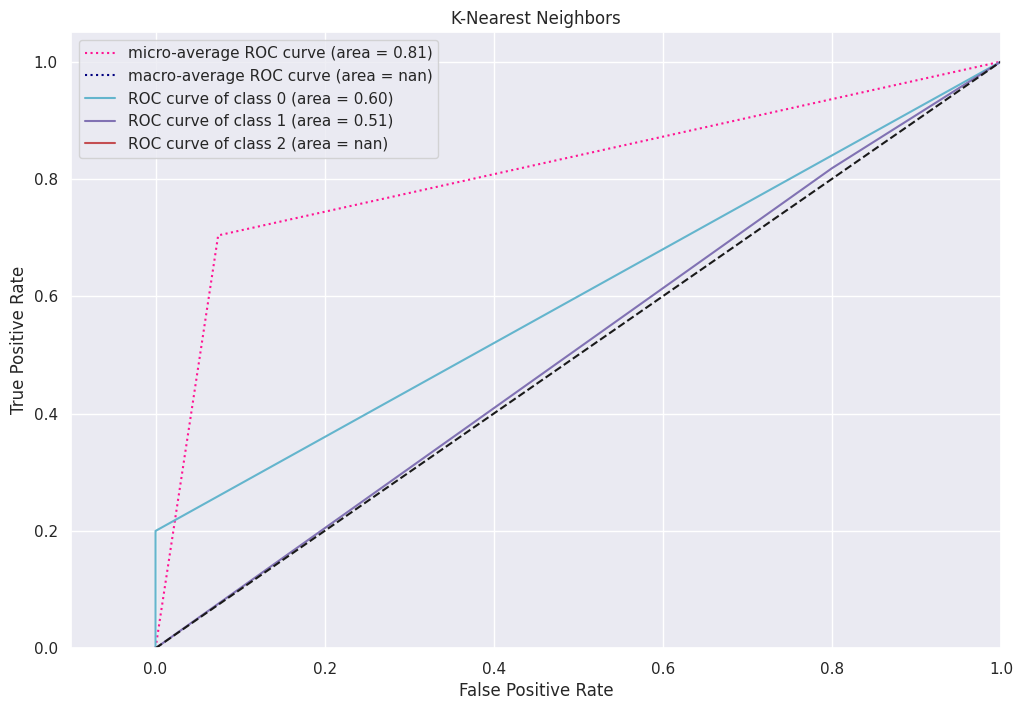

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


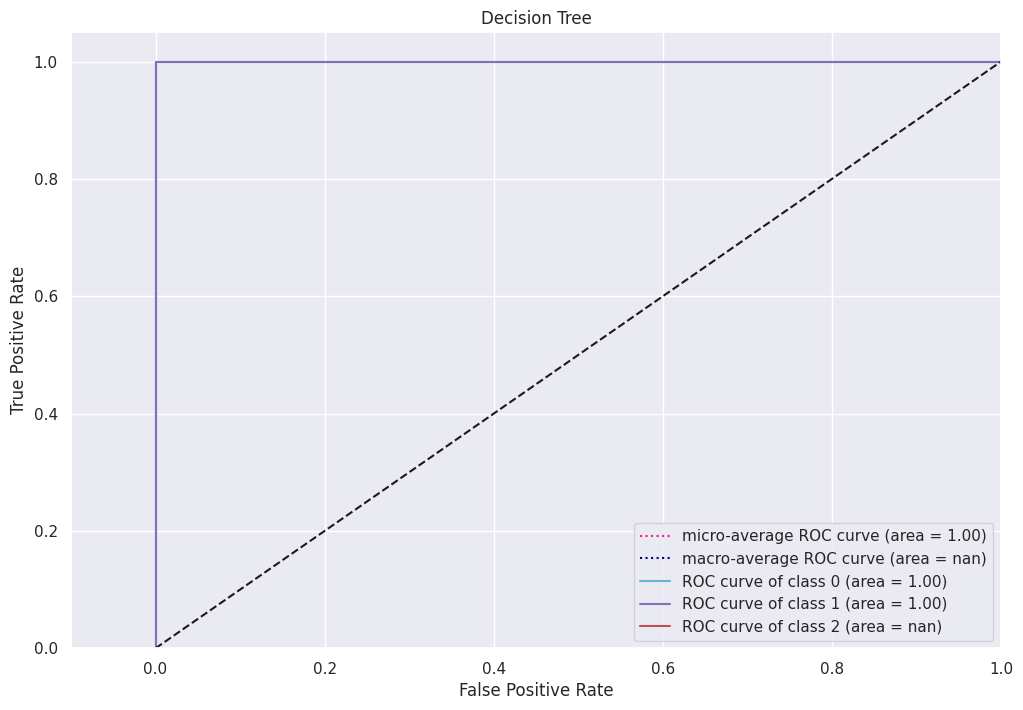

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


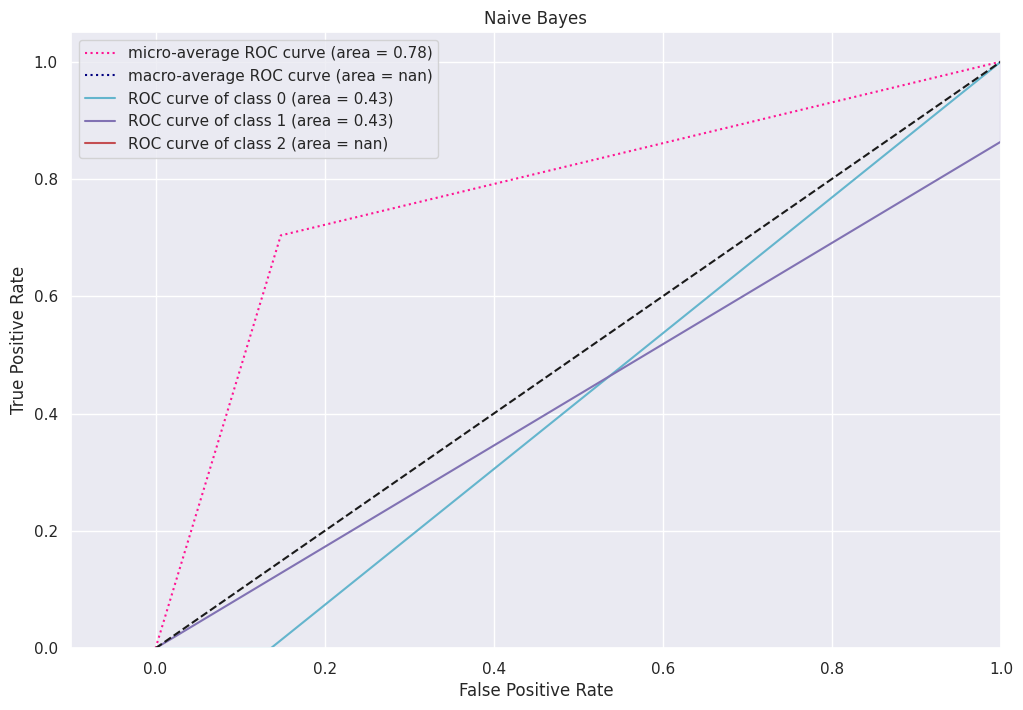

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


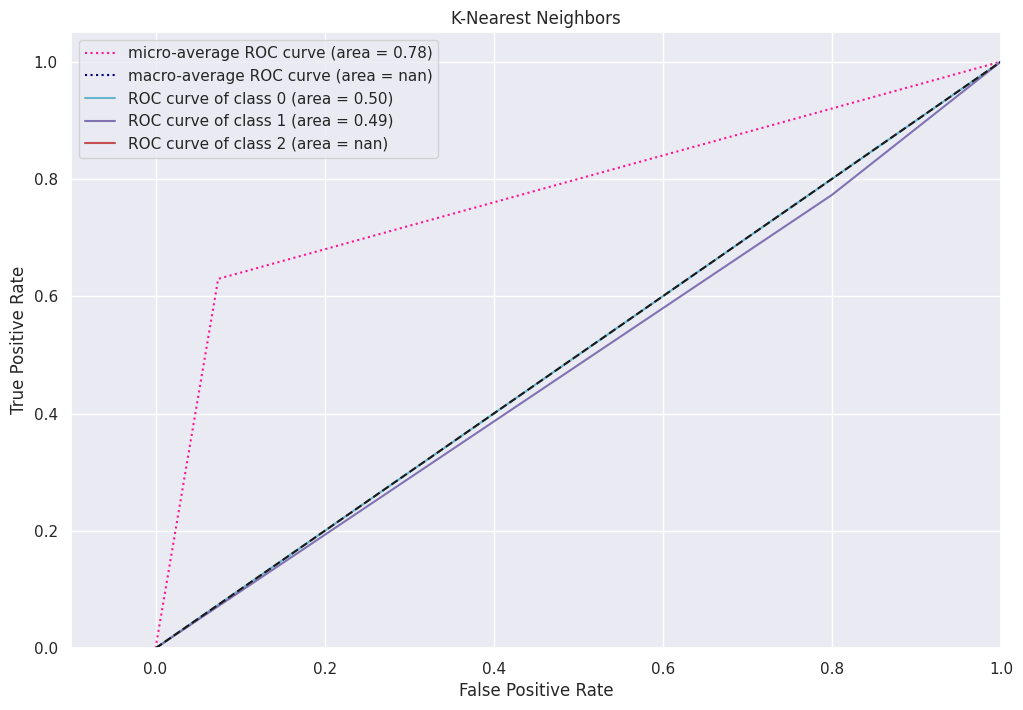

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


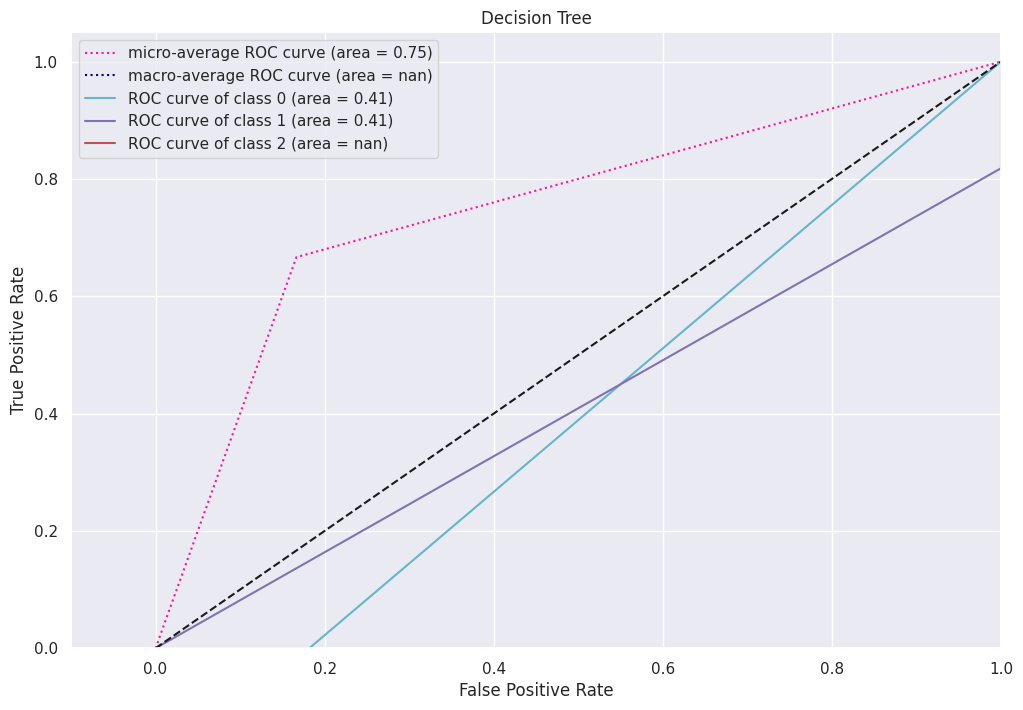

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


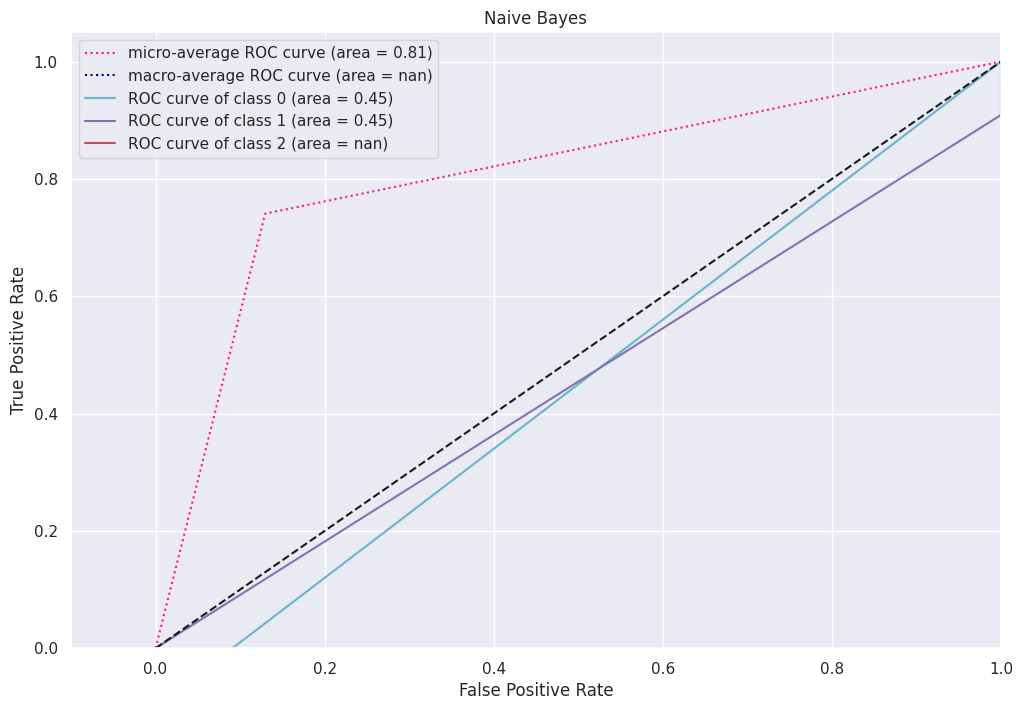

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


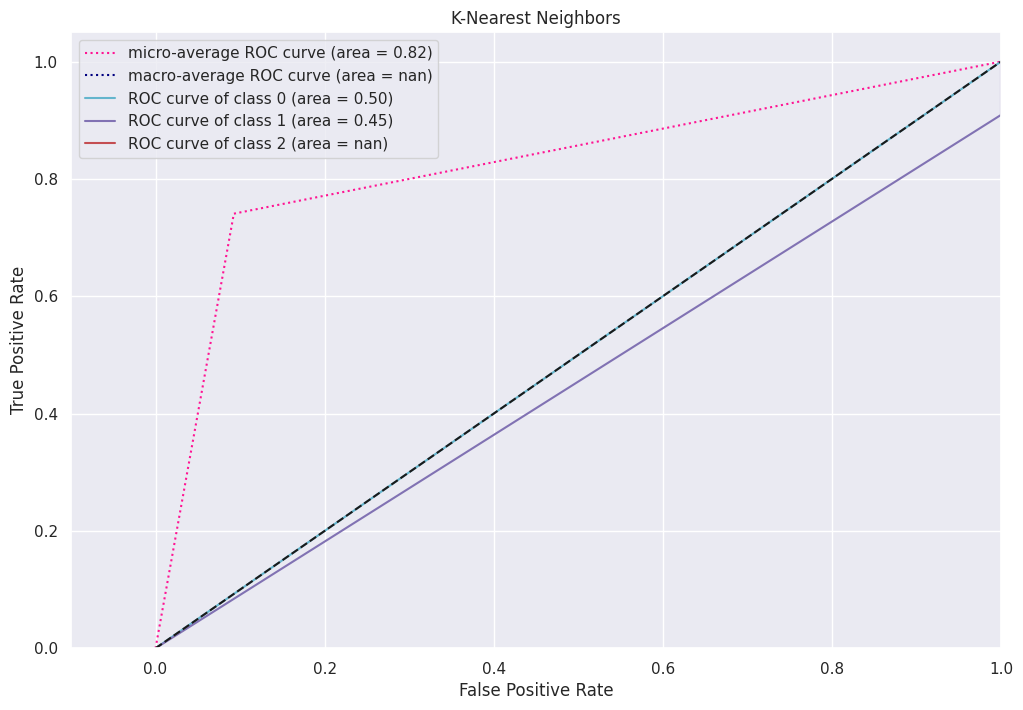

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


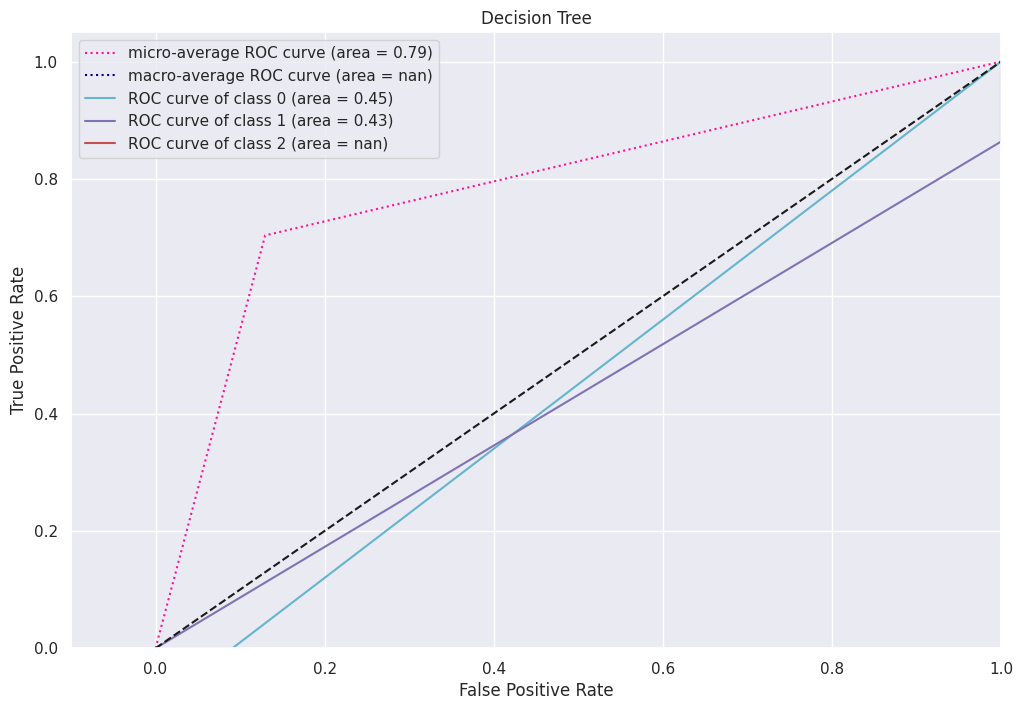

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

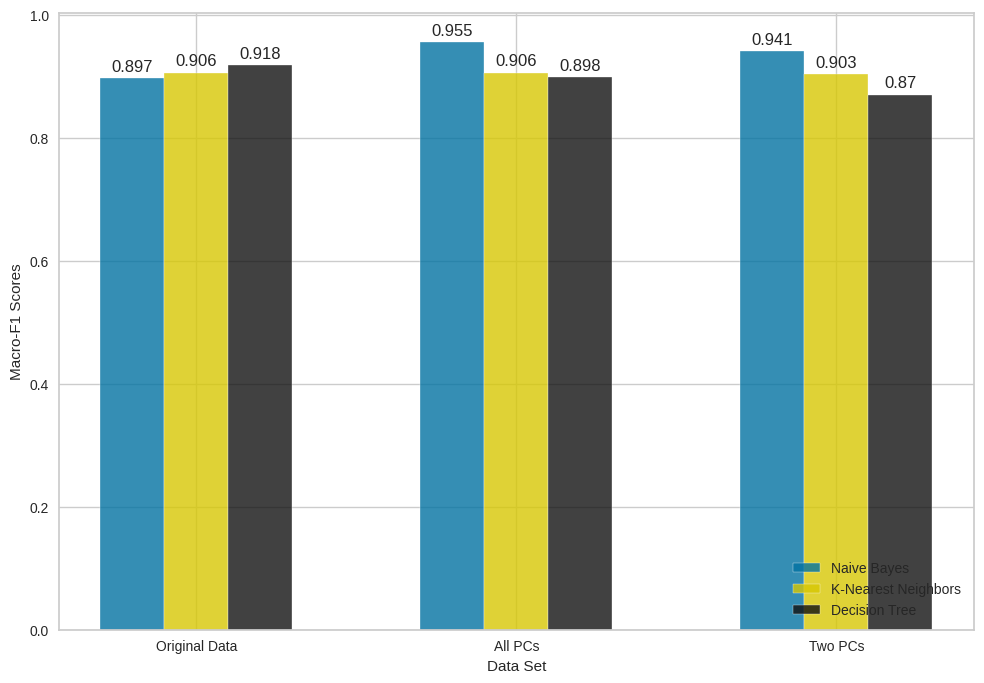

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()